# Logistc Regression Model to Solve "Superhost" Classification

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve


## Build DataFrame and Define ML Problem

In [3]:
filename = os.path.join(os.getcwd(), "data_LR", "airbnbData_train.csv")
df = pd.read_csv(filename)

df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,False,True,True,True,False,-0.578829,-2.845589,-0.054298,-0.054298,-1.007673,...,1.888373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,True,True,True,False,-4.685756,-0.430024,-0.112284,-0.112284,0.067470,...,0.409419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,False,True,True,True,False,0.578052,-2.473964,-0.112284,-0.112284,0.605041,...,-1.069535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,False,True,False,True,False,0.578052,1.010024,-0.112284,-0.112284,-0.470102,...,-0.576550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,True,True,True,False,-0.054002,-0.066308,-0.112284,-0.112284,-1.007673,...,0.902404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Create Labeled Examples from the Data Set 

In [4]:
y = df['host_is_superhost']
X = df.drop(columns = 'host_is_superhost')

## Create Training and Test Data Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

## Train, Test and Evaluate a Logistic Regression Model With Default Hyperparameter Values

In [6]:
# 1.0 is the default for hyper-parameter C
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<b>Test model on the test set (`X_test`). </b>


In [7]:
# 1. Make predictions on the test data using the predict_proba() method
# save the value of the scond coloumn to a list, since 2 columns aare returns when using
# the predict)propa) method, the first is False the second is True
prediction = model_default.predict_proba(X_test)
proba_predictions_default = prediction[:,1]

# 2. Make predictions on the test data using the predict() method
# returns the class label (True of False) per unlabled example
class_label_predictions_default = model_default.predict(X_test)

In [8]:
# evaluate the accuracy of the model using aconfusion matrix
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True,False])
pd.DataFrame(
c_m, 
columns = ['Predicted: Host is Superhost', 'Predicted: Host is Not Superhost'],
index = ['Actual: Host is Not Superhost', 'Actual: Host is Superhost'])

,Predicted: Host is Superhost,Predicted: Host is Not Superhost
Actual: Host is Not Superhost,264,451
Actual: Host is Superhost,91,1997


## Logistic Regression Model Selection Using `GridSearchSV()`

### Set Up a Parameter Grid 

In [9]:
# dictionary called param_grid that contains 10 possible hyperparameter values for C
cs = [10**i for i in range (-5,5)]
param_grid = {'C': list(cs)}
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

### Perform Grid Search Cross-Validation

In [10]:
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'
model = LogisticRegression(max_iter=1000)


# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.
grid = GridSearchCV(model, param_grid, cv=5)


# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


Retrieve the value of the hyperparameter $C$ for which the best score was attained. Save the result to the variable `best_c`.

In [11]:
# YOUR CODE HERE
best_c = grid_search.best_params_['C']
best_c

100

## Train, Test and Evaluate the Optimal Logistic Regression Model 

In [12]:
model_best = LogisticRegression(C=best_c, max_iter=1000)
model_best.fit(X_train,y_train)

LogisticRegression(C=100, max_iter=1000)

Test model on the test set (`X_test`).

In [13]:
# 1. Make predictions on the test data using the predict_proba() method
# predict class probabilities and save values of the socond coloumn to a list
prediction = model_best.predict_proba(X_test)
proba_predictions_best = prediction[:,1]

# 2. Make predictions on the test data using the predict() method
class_label_predictions_best = model_best.predict(X_test)

Evaluate the accuracy of the model using a confusion matrix. 

In [14]:
c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True,False])

pd.DataFrame(
c_m,
columns=['Predicted: Customer Will Leave', 'Predicted: Customer Will Stay'],
index=['Actual: Customer Will Leave', 'Actual: Customer Will Stay']
)

,Predicted: Customer Will Leave,Predicted: Customer Will Stay
Actual: Customer Will Leave,268,447
Actual: Customer Will Stay,91,1997


## Plot Precision-Recall Curves for Both Models

In [15]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

Lineplots to visualize the precision-recall curve for both models.


Text(0, 0.5, 'Precision')

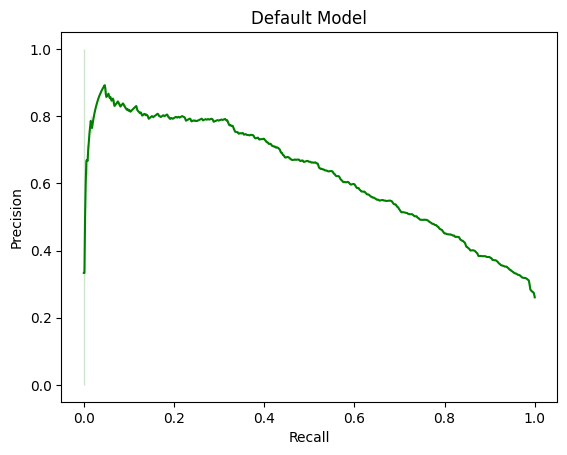

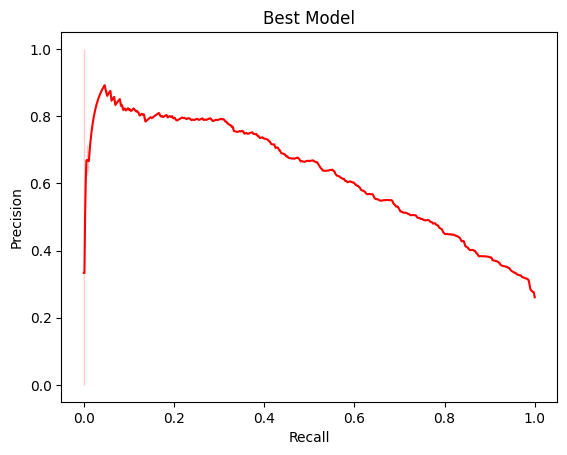

In [16]:
plt.figure()
sns.lineplot(x=recall_default, y=precision_default, color='green')
plt.title('Default Model')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.figure()
best = sns.lineplot(x=recall_best, y=precision_best, color='red')
plt.title('Best Model')
plt.xlabel('Recall')
plt.ylabel('Precision')


## ROC Curves and Compute the AUC for Both Models

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [18]:
#record the true and false positives for both models
#fpr=false positive rate, trp=true positive rate
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

#### Plot ROC Curve for Default Hyperparameter:

Text(0, 0.5, 'True Positive Rate')

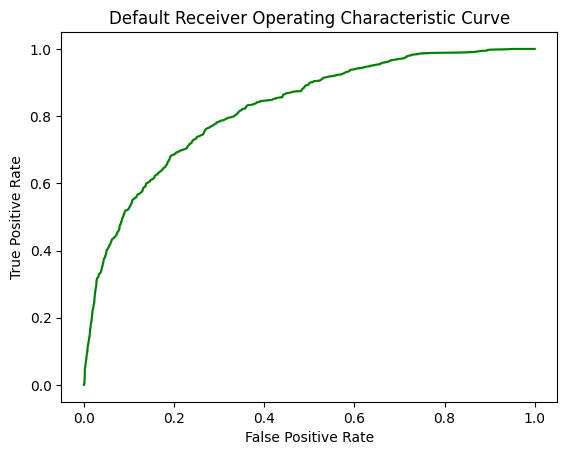

In [19]:
plt.figure()
default = sns.lineplot(x=fpr_default, y=tpr_default, color='green')
plt.title('Default Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Plot ROC Curve for Best Hyperparameter:

Text(0, 0.5, 'True Positive Rate')

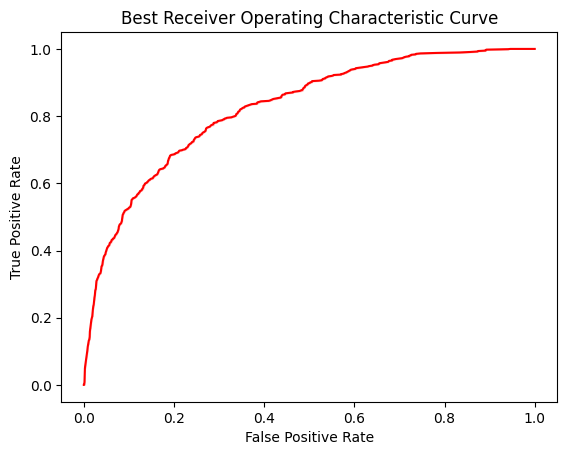

In [20]:
plt.figure()
best = sns.lineplot(x=fpr_best, y=tpr_best, color='red')
plt.title('Best Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [21]:
#use the auc)() function to compute the area under the ROC curve
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.8228632478632479
0.8235464726844037


## Feature Selection Using SelectKBest

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

# Create new training and test data for features
new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]


# Initialize a LogisticRegression model object with the best value of hyperparameter C 
# C is from grid search csv
# The model object should be named 'model'
# Note: Supply max_iter=1000 as an argument when creating the model object
model = LogisticRegression(C=best_c, max_iter=1000)

# Fit the model to the new training data, using old y_train?
model.fit(new_X_train, y_train)

# Use the predict_proba() method to use your model to make predictions on the new test data 
# Save the values of the second column to a list called 'proba_predictions'
prediction = model.predict_proba(new_X_test)
proba_predictions = prediction[:,1]


# Compute the auc-roc
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)

Best 5 features:
Index(['host_response_rate', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_cleanliness'],
      dtype='object')
0.7971555743107468


The AUC value decreased from 0.82 to 0.79 when using the best  Additionally, the best AUC value uses the features, host_response_rate, numbeer_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, and review_scores_cleanliness. All of these features are also objects. 